# MACHINE LEARNING LAB - TASK 2 : REGRESSION

### Importing Libraries and Loading Dataset

In [1]:
#for visualisation and data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for ML model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_excel('Task 2 ML Data.xlsx',sheet_name='Sheet1')
df.head()

,Date,NO2,CO,O3,PM2.5,SO2,Air Quality,WIND,TEMP,PRESSURE,RH
0,2010-01-01,38.16,0.704,0.03348,13.526531,7.7,54,5.854167,46.000000,1030.041667,65.916667
1,2010-01-02,37.10,0.880,0.03996,14.953061,14.7,57,2.970833,44.000000,1028.208333,63.291667
2,2010-01-03,38.16,0.440,0.02484,15.428571,21.7,58,3.579167,44.041667,1025.833333,69.625000
3,2010-01-04,26.50,0.440,0.03348,10.800000,32.9,47,6.891667,41.750000,1031.208333,60.166667
4,2010-01-05,45.58,0.616,0.03348,15.904082,34.3,59,2.233333,37.333333,1032.125000,59.916667


### Cleaing and Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   NO2          365 non-null    float64       
 2   CO           365 non-null    float64       
 3   O3           365 non-null    float64       
 4   PM2.5        365 non-null    float64       
 5   SO2          365 non-null    float64       
 6   Air Quality  365 non-null    int64         
 7   WIND         365 non-null    float64       
 8   TEMP         365 non-null    float64       
 9   PRESSURE     365 non-null    float64       
 10  RH           365 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 31.5 KB


In [4]:
df.isna().sum()

Date           0
NO2            0
CO             0
O3             0
PM2.5          0
SO2            0
Air Quality    0
WIND           0
TEMP           0
PRESSURE       0
RH             0
dtype: int64

In [5]:
df.dtypes

Date           datetime64[ns]
NO2                   float64
CO                    float64
O3                    float64
PM2.5                 float64
SO2                   float64
Air Quality             int64
WIND                  float64
TEMP                  float64
PRESSURE              float64
RH                    float64
dtype: object

In [6]:
df.shape

(365, 11)

In [7]:
df.describe()

,NO2,CO,O3,PM2.5,SO2,Air Quality,WIND,TEMP,PRESSURE,RH
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,34.949008,0.506301,0.046087,13.626266,13.476947,63.747945,4.538818,68.747160,1016.835502,67.835502
std,16.596962,0.294035,0.016503,4.748510,11.535875,28.919593,1.903770,14.415286,5.656928,11.991668
min,7.420000,0.176000,0.015120,4.560000,0.000000,25.000000,1.204167,28.125000,1000.666667,24.458333
25%,22.260000,0.264000,0.034560,10.320000,4.900000,45.000000,3.008333,57.375000,1013.416667,62.416667
50%,31.800000,0.440000,0.043200,13.051020,9.800000,56.000000,4.145833,71.250000,1016.250000,69.041667
75%,44.520000,0.528000,0.054000,16.379592,18.900000,67.000000,5.716667,81.583333,1020.083333,75.500000
max,111.571429,1.760000,0.096857,34.924490,72.612245,179.000000,11.883333,89.125000,1038.208333,92.458333


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'SO2'}>],
       [<AxesSubplot:title={'center':'Air Quality'}>,
        <AxesSubplot:title={'center':'WIND'}>,
        <AxesSubplot:title={'center':'TEMP'}>],
       [<AxesSubplot:title={'center':'PRESSURE'}>,
        <AxesSubplot:title={'center':'RH '}>, <AxesSubplot:>]],
      dtype=object)

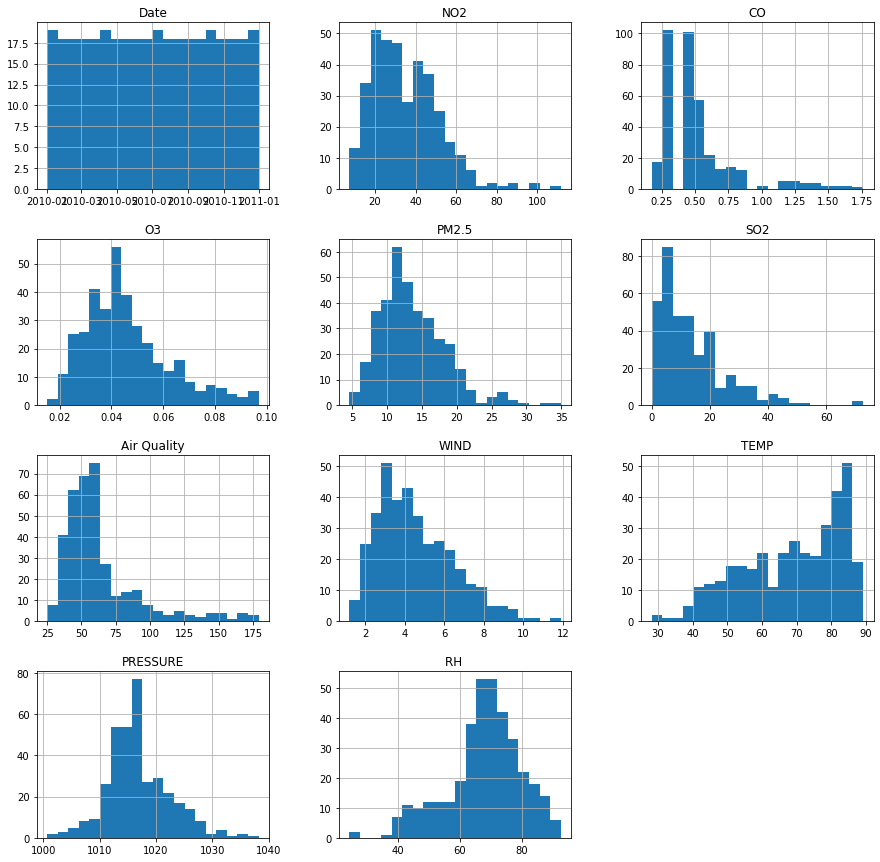

In [8]:
#histogram to see the distribution and inconsistency
df.hist(figsize=(15,15),bins=20)

### Feature Selection

In [9]:
#correlation
df.corr()

,NO2,CO,O3,PM2.5,SO2,Air Quality,WIND,TEMP,PRESSURE,RH
NO2,1.000000,0.604258,0.399728,0.150477,0.353760,0.373292,-0.316142,-0.440287,0.301002,-0.406800
CO,0.604258,1.000000,0.173478,0.226181,0.249409,0.184298,-0.376012,-0.322150,0.261251,-0.180713
O3,0.399728,0.173478,1.000000,0.305914,0.180373,0.790639,-0.397071,0.226341,-0.068627,-0.409555
PM2.5,0.150477,0.226181,0.305914,1.000000,0.146086,0.590689,-0.324576,0.125795,0.018567,0.006034
SO2,0.353760,0.249409,0.180373,0.146086,1.000000,0.205725,-0.189428,-0.293679,0.189862,-0.168953
Air Quality,0.373292,0.184298,0.790639,0.590689,0.205725,1.000000,-0.427784,0.189282,-0.039216,-0.289967
WIND,-0.316142,-0.376012,-0.397071,-0.324576,-0.189428,-0.427784,1.000000,-0.254101,-0.120439,0.080265
TEMP,-0.440287,-0.322150,0.226341,0.125795,-0.293679,0.189282,-0.254101,1.000000,-0.601621,0.123477
PRESSURE,0.301002,0.261251,-0.068627,0.018567,0.189862,-0.039216,-0.120439,-0.601621,1.000000,-0.272483
RH,-0.406800,-0.180713,-0.409555,0.006034,-0.168953,-0.289967,0.080265,0.123477,-0.272483,1.000000


<AxesSubplot:>

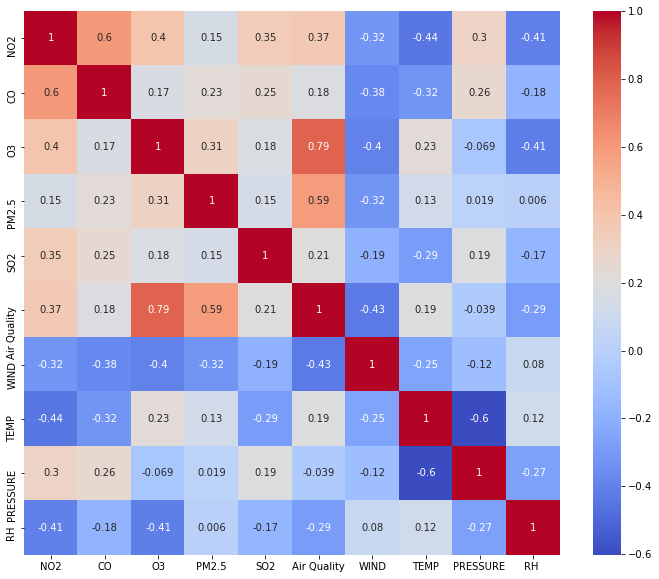

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

The pollutants that affect AQI are NO2,CO,O3,PM2.5 and So2. However, we'll choose only four for our regression model features. These feature selection is based on correlation. We choose features that are least correlated.
- Therefore, the features for regression model are - **CO,O3,PM2.5 and SO2**

In [11]:
# Air quality Index Calculator Function
#defining air quality index range output
def AQI_output(num):
    if num>=0 and num<=50:
        return 'Good'
    elif num>=51 and num<=100:
        return 'Satisfactory'
    elif num>=101 and num<=200:
        return 'Moderately Polluted'
    elif num>=201 and num<=300:
        return 'Poor'
    elif num>=301 and num<=400:
        return 'Very Poor'
    else:
        return 'Severe'

### Regression Model - Training and Testing
- Multiple Linear Regression line will be --> y = c1x1 + c2x2 + c3x3 + c4x4 + I
- where, c = coeff, y = AQI , I = intercept, x1 = CO, x2 = O3, x3 = PM2.5 and x4 = SO2.


**AQI = c1xCO + c2xO3 + c3xPM2.5 + c4xSO2 + Intercept**

In [12]:
#assigning independent and dependent variables
# x = independent variables
# y = dependent variable

x = df[['CO','O3','PM2.5','SO2']].values    #all the dependent variables
y = df['Air Quality'].values                  #output variable

In [13]:
print(x)  

[[ 0.704       0.03348    13.52653061  7.7       ]
 [ 0.88        0.03996    14.95306122 14.7       ]
 [ 0.44        0.02484    15.42857143 21.7       ]
 ...
 [ 0.528       0.03672     7.68        2.1       ]
 [ 0.528       0.03348    12.5755102   4.2       ]
 [ 0.528       0.03564    14.00204082  6.3       ]]


In [14]:
print(y)

[ 54  57  58  47  59  67  39  32  63  62  62  85  93  60  45  62  61  56
  42  48  61  61  62  40 101  67  54  42  34  35  64  83  63  63  45  28
  37  62  51  35  54  55  35  60  55  43  66 101  67  64  53  60  28  53
  44 103  52  48  60  41  43  59  61  58  84  61  72  56  61  70  53  58
  67  61  71  57  51  61  45  38  63  87  45  41  74  48  44  58  74  48
  49  71  97  61  54  51  51  50  93  61  84  84  64  52  49  59  80  58
  62  64 126  52  62  54  50  93  54 129  51  63  77 112 179 174 147 105
  73  54  54  57  62  60  57  56  35  67  93 115  39  42  33  30  60  49
  49 164 143 150 147 105  84  84  48  41  64  59  80  57  70  87  80  67
  38  53  48  52  48  53  45  38  46  77  71  53  50  44  43  41  40  38
  34  36  61  48  54  53  51  48  66  87 101  61  62  86  64  76 166  93
  45  51  59  65  49  65 122  87  57  36  55  59  59  56 102 140 143  80
  45  48  41  37  40 136 169  66  53  58  44  53 129  44  36  31  44  94
  93  97  97  81 122  59  50  38  39  49  58  37  8

In [15]:
#splitting the training and testing data in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [16]:
#training the model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print("******************************************")
print('      Model Training Completed')
print("******************************************")

******************************************
      Model Training Completed
******************************************


In [17]:
# coefficients of MLR
coeff = mlr.coef_
c1 = coeff[0]
c2 = coeff[1]
c3 = coeff[2]
c4 = coeff[3]
print('The coefficient c1 =',c1)
print('The coefficient c2 =',c2)
print('The coefficient c3 =',c3)
print('The coefficient c4 =',c4)

The coefficient c1 = -3.774762110417575
The coefficient c2 = 1147.020451285624
The coefficient c3 = 2.3870115724145173
The coefficient c4 = 0.040957092430238276


In [18]:
#intercept of mlr
i = mlr.intercept_
print("The intercept of MLR =",i)

The intercept of MLR = -20.186681748023283


In [19]:
#getting the regression line
regline = coeff*x + i

In [20]:
# TESTING - calculating predicted values
y_pred = mlr.predict(x_test)
print(y_pred)

[ 96.41218631  64.38517081  43.42802991  70.69187974  51.74897483
  38.19462318  63.13742993  69.45533345  79.10586687  39.26980549
  84.48528751  27.56302531  58.75826672  68.94873294  44.2537307
  66.32634251  62.84874294  87.36706753  98.81748247  36.71436617
  58.17496183  35.51044151  51.27688552  54.89629097  91.1173431
  62.55628552  62.5221576   41.84751973  68.38702847  57.07366624
 109.68280216  77.31689646  61.35166157  56.97333575  46.68083469
  61.86221204  49.59979233  54.69566737  51.27244473  90.42806275
  76.7547092   65.76259947  96.70129422  52.47834639  60.76740381
  37.55128405 119.6329627  125.19695729  60.97333696  82.3688016
  63.89778141  49.50192192  98.58187164  38.55215861 106.72087806
  61.57241767  27.83702252  77.27587499  64.31607591  70.0590989
  31.11387373  96.61258777  35.86664425  79.09290954  35.76662108
  52.5798204   54.89401745 122.17529281  32.22177809  83.27593045
  64.49132904  59.37496084  62.38847619]


In [21]:
#comparing the values in a dataframe
comp = pd.DataFrame({'Actual Value (y_test)':y_test,'Predicted Value (y_pred)':y_pred})
comp.tail()      #looking last 5 values       

,Actual Value (y_test),Predicted Value (y_pred)
68,37,32.221778
69,87,83.275930
70,71,64.491329
71,46,59.374961
72,50,62.388476


In [22]:
#calculating the training and testing score
print("Training Score evaluated is: ",mlr.score(x_train,y_train))
print("Test Score evaluated is: ",mlr.score(x_test,y_test))

Training Score evaluated is:  0.7732043397859023
Test Score evaluated is:  0.711565307900207


### Evaluating the Model

In [23]:
# 1. checking correlation
comp.corr()

,Actual Value (y_test),Predicted Value (y_pred)
Actual Value (y_test),1.000000,0.848555
Predicted Value (y_pred),0.848555,1.000000


<AxesSubplot:>

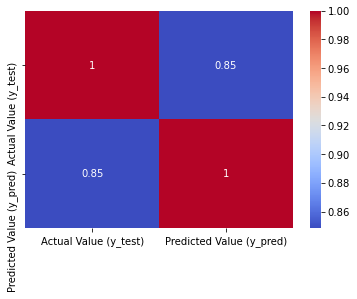

In [24]:
sns.heatmap(comp.corr(),annot=True,cmap='coolwarm')

- the predicted and actual results are 85% correlated.

In [25]:
# 2: Mean Square Error , Root Mean Square Error, Mean Absolute Error and R2 score evaluation
print('Mean Squared Error is :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error is :',metrics.mean_absolute_error(y_test, y_pred)) 
print('R-2 Score is :', metrics.r2_score(y_test, y_pred))

Mean Squared Error is : 258.95990327100117
Root Mean Squared Error is : 16.092231146457014
Mean Absolute Error is : 11.18096064852346
R-2 Score is : 0.711565307900207


- The lesser the error the efficient the model is, thus this model has a 71% R2 score (accuracy).

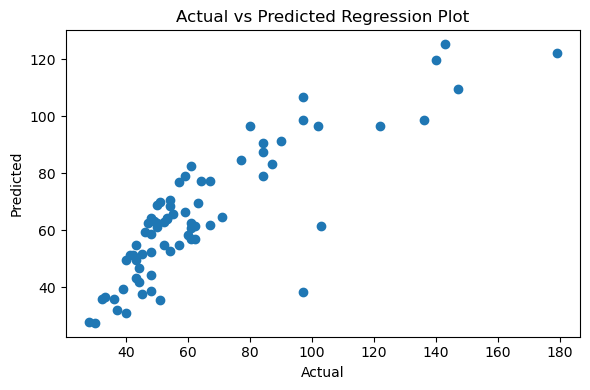

In [26]:
# 3. Regression Plot
plt.figure(dpi=100)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Regression Plot')
plt.tight_layout()
plt.show()